## Import Libraries and Load Dataset

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.datasets import cifar10
import pandas as pd

In [6]:
#Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#Verify the shapes
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Unique labels:", np.unique(y_train))

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


In [7]:
# Define CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Task 1: Data Exploration and Preparation

#### Display 5 Sample Images with Labels

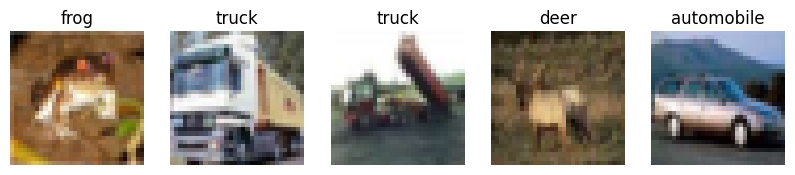

In [8]:
# Display sample images
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

#### Print Dataset Shape and Count Unique Labels

In [9]:
print("Training Data Shape:", x_train.shape)
print("Test Data Shape:", x_test.shape)
print("Number of unique labels:", len(np.unique(y_train)))

Training Data Shape: (50000, 32, 32, 3)
Test Data Shape: (10000, 32, 32, 3)
Number of unique labels: 10


####Normalize Image Pixel Values

In [10]:
# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

 ## Task 2: Build and Train a CNN Model

#### Define the CNN Model

In [11]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    Dropout(0.2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

#### Compile the Model

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Train the Model

In [13]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15, batch_size=64)

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 131s 164ms/step - accuracy: 0.2835 - loss: 1.9098 - val_accuracy: 0.5257 - val_loss: 1.3471
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 126s 160ms/step - accuracy: 0.4854 - loss: 1.4130 - val_accuracy: 0.5929 - val_loss: 1.1556
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 138s 156ms/step - accuracy: 0.5560 - loss: 1.2533 - val_accuracy: 0.6530 - val_loss: 1.0148
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 154ms/step - accuracy: 0.5872 - loss: 1.1513 - val_accuracy: 0.6686 - val_loss: 0.9548
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 123s 157ms/step - accuracy: 0.6191 - loss: 1.0776 - val_accuracy: 0.6852 - val_loss: 0.9114
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 144s 160ms/step - accuracy: 0.6343 - loss: 1.0375 - val_accuracy: 0.6861 - val_loss: 0.8982
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 156ms/step - accuracy: 0.6549 - loss: 0.9856 - val_accuracy: 0.7110 - val_loss: 0.8372
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 156ms/step - accuracy: 0.6596 -

#### Plot Training and Validation Loss & Accuracy

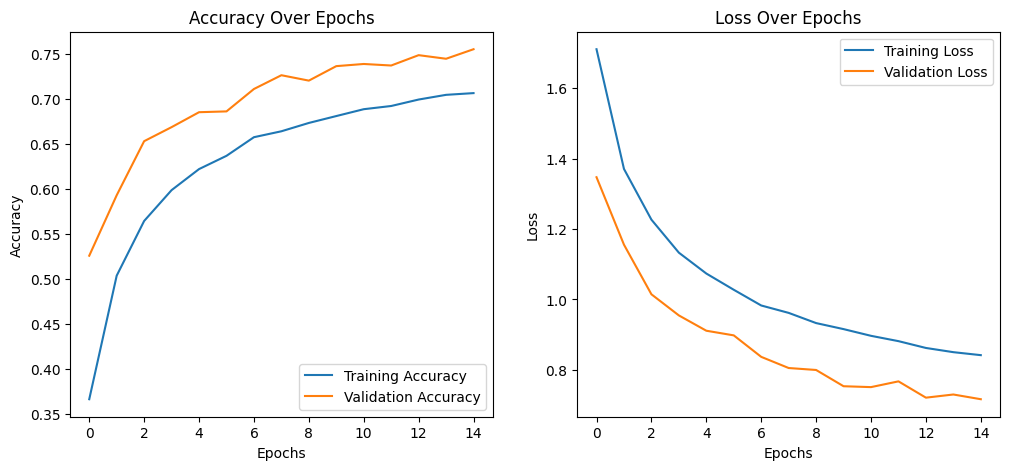

In [14]:
# Plot training history
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Accuracy Over Epochs (Left Graph)**

 >`Y-axis`: Accuracy (Training & Validation)

 >`X-axis`: Number of Epochs

* Blue Line (Training Accuracy):

 >Starts low (~35%) but steadily increases over epochs, reaching ~72%.

* Orange Line (Validation Accuracy):

 >Rises quickly in early epochs, reaching ~75%, but then stabilizes.

*Higher than training accuracy in early epochs, which suggests better generalization initially.*

**Loss Over Epochs (Right Graph)**

>`Y-axis`: Loss (Training & Validation)

>`X-axis`: Number of Epochs

* Blue Line (Training Loss):

 >Starts high (~1.7) and steadily decreases, indicating that the model is learning.

* Orange Line (Validation Loss):

 >Also decreases but stabilizes around epoch 10, suggesting the model has reached its best performance.

## Task 3: Evaluate the Model

#### Evaluate on Test Set

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.7550 - loss: 0.7066
Test Accuracy: 0.7552


#### Generate Confusion Matrix and Classification Report

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step
              precision    recall  f1-score   support

    airplane       0.77      0.79      0.78      1000
  automobile       0.85      0.92      0.88      1000
        bird       0.67      0.62      0.64      1000
         cat       0.59      0.55      0.57      1000
        deer       0.73      0.67      0.70      1000
         dog       0.76      0.56      0.65      1000
        frog       0.67      0.91      0.77      1000
       horse       0.82      0.81      0.81      1000
        ship       0.84      0.89      0.86      1000
       truck       0.86      0.84      0.85      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.75     10000
weighted avg       0.76      0.76      0.75     10000



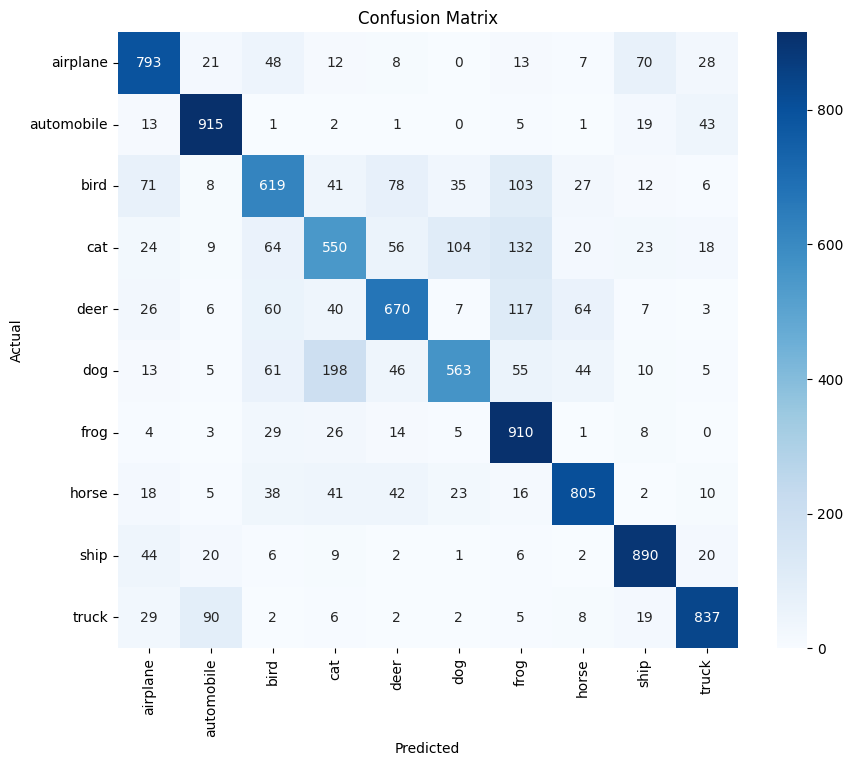

In [16]:
y_pred = np.argmax(model.predict(x_test), axis=1)

# Classification report
print(classification_report(y_test, y_pred, target_names=class_names))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Confusion Matrix Explanation
The confusion matrix shows how well the model classified each of the 10 CIFAR-10 categories.

* Diagonal values (highlighted in dark blue) → Correct classifications for each
category.

  >Example: 915 automobiles were correctly classified as automobiles.

* Off-diagonal values (lighter blue areas) → Misclassifications.

 >Example: 71 birds were misclassified as airplanes.

**Common misclassifications:**

* Birds are confused with cats and deer.

* Dogs are misclassified as cats and deer.

* Ships and trucks have strong predictions, meaning the model distinguishes them well.

### Classification Report Explanation

* Higher `precision` (near 1.0) means fewer false positives.

* **Best precision:** Trucks (0.86), Ships (0.84), and Automobiles (0.85) → Well-classified.

* Best `recall`: Automobiles (0.92) and Frogs (0.91).

* `F1-score`: The balance between precision and recall.

* Highest F1-scores:

 >Automobiles (0.88), Ships (0.86), and Trucks (0.85) → Strongest classes.

* Weakest class: Cats (0.57) → Model struggles to classify cats correctly.

* Overall Accuracy: 76%

 >The model performs well but struggles with animals like cats, dogs, and birds.

#### Display Correctly and Incorrectly Classified Images

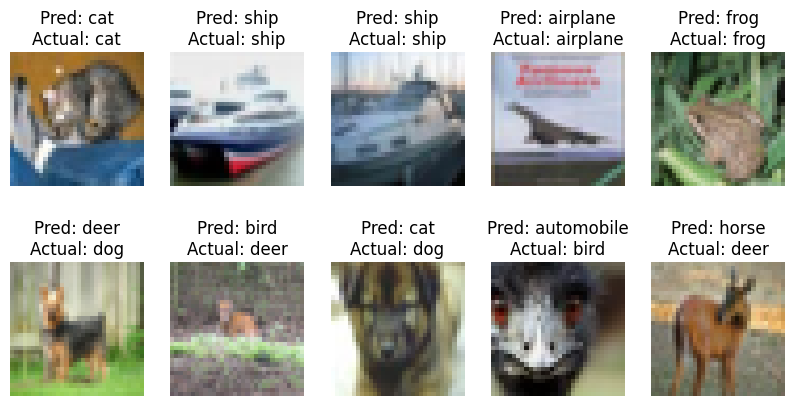

In [17]:
correct = np.where(y_pred == y_test.reshape(-1))[0]
incorrect = np.where(y_pred != y_test.reshape(-1))[0]

# Display 5 correctly classified images
plt.figure(figsize=(10,5))
for i, idx in enumerate(correct[:5]):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[idx])
    plt.title(f"Pred: {class_names[y_pred[idx]]}\nActual: {class_names[y_test[idx][0]]}")
    plt.axis('off')

# Display 5 incorrectly classified images
for i, idx in enumerate(incorrect[:5]):
    plt.subplot(2,5,i+6)
    plt.imshow(x_test[idx])
    plt.title(f"Pred: {class_names[y_pred[idx]]}\nActual: {class_names[y_test[idx][0]]}")
    plt.axis('off')

plt.show()

## Task 4: Experimentation with Model Improvements

#### Experiment with Different Optimizers

In [18]:
# Using SGD optimizer instead of Adam
model_sgd = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    Dropout(0.2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_sgd.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_sgd = model_sgd.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15, batch_size=64)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 174ms/step - accuracy: 0.1124 - loss: 2.2964 - val_accuracy: 0.2341 - val_loss: 2.1770
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 131s 161ms/step - accuracy: 0.2046 - loss: 2.1255 - val_accuracy: 0.2749 - val_loss: 2.0154
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 136s 153ms/step - accuracy: 0.2472 - loss: 2.0237 - val_accuracy: 0.2547 - val_loss: 2.0457
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 121s 154ms/step - accuracy: 0.2920 - loss: 1.9115 - val_accuracy: 0.3227 - val_loss: 1.8746
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 124s 159ms/step - accuracy: 0.3361 - loss: 1.8009 - val_accuracy: 0.3086 - val_loss: 1.8629
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 156ms/step - accuracy: 0.3660 - loss: 1.7256 - val_accuracy: 0.4414 - val_loss: 1.5796
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 145s 159ms/step - accuracy: 0.3837 - loss: 1.6743 - val_accuracy: 0.4470 - val_loss: 1.5661
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 121s 155ms/step - accuracy: 0.4047 -

### Optimizers affect how the model learns

* Different optimizers adjust weights differently during training, impacting convergence speed and final accuracy.

* For example, SGD updates weights using a fixed learning rate, while Adam dynamically adjusts learning rates for faster convergence.

### Our initial model showed slow improvement

* The accuracy started very low (11.24%) in Epoch 1 and improved gradually.

* By Epoch 15, training accuracy was 49.78%, and validation accuracy reached 52.42%, indicating slower learning and possible optimization inefficiencies.

#### Performance Comparison Table

In [19]:
performance = pd.DataFrame({
    "Model": ["CNN (Adam)", "CNN (SGD)"],
    "Test Accuracy": [test_acc, model_sgd.evaluate(x_test, y_test)[1]]
})

print(performance)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.5277 - loss: 1.3189
        Model  Test Accuracy
0  CNN (Adam)         0.7552
1   CNN (SGD)         0.5242


* The CNN model trained with Adam optimizer achieved a test accuracy of 75.52%, indicating that it generalizes well to unseen CIFAR-10 images, whereas the model trained with SGD performed worse at 52.42%, likely due to slower convergence and suboptimal learning rate settings.

* The test loss of 1.3189 suggests that while the model makes reasonably accurate predictions, there is room for improvement through techniques like hyperparameter tuning, data augmentation, or using a more advanced architecture.